# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

weather_api_key = "4f87e58ba776f61e9be863d8aa3a5746"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units = "imperial"

#baseurl
base_url ="http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url + "&appid=" + weather_api_key + "&units=" + units

#Notation for API: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#checked tos ee if this works
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&appid=4f87e58ba776f61e9be863d8aa3a5746&units=imperial


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(650)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#data

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

count = 0
total_cities = len(cities)


print("Begining Data Retrieval")
print("-------------------------------")

for city in cities:
    try:   
        response = requests.get(query_url + "&q=" + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])



        print(f"Processing {count} of {total_cities} | {city}")
        
        time.sleep(1.01)
        
    except:
        print(f"{city} not found. Skipping...")
        print(f"{query_url}&q={city}")
    count = count + 1


Begining Data Retrieval
-------------------------------
Processing 0 of 629 | yellowknife
Processing 1 of 629 | tres arroyos
Processing 2 of 629 | savannah bight
Processing 3 of 629 | hamilton
Processing 4 of 629 | hilo
Processing 5 of 629 | salalah
Processing 6 of 629 | gorontalo
Processing 7 of 629 | cape town
Processing 8 of 629 | ushuaia
Processing 9 of 629 | barrow
Processing 10 of 629 | albany
Processing 11 of 629 | newcastle
Processing 12 of 629 | ulaanbaatar
Processing 13 of 629 | lakhipur
Processing 14 of 629 | careiro da varzea
Processing 15 of 629 | bethel
Processing 16 of 629 | kahului
Processing 17 of 629 | port alfred
Processing 18 of 629 | taksimo
Processing 19 of 629 | busselton
Processing 20 of 629 | norman wells
Processing 21 of 629 | dikson
Processing 22 of 629 | rikitea
Processing 23 of 629 | hermanus
Processing 24 of 629 | butaritari
Processing 25 of 629 | kapaa
Processing 26 of 629 | geraldton
Processing 27 of 629 | hobart
Processing 28 of 629 | airai
Processing 2

Processing 186 of 629 | yumen
Processing 187 of 629 | ribnitz-damgarten
Processing 188 of 629 | roald
Processing 189 of 629 | cidreira
Processing 190 of 629 | altay
Processing 191 of 629 | vostok
Processing 192 of 629 | omsukchan
Processing 193 of 629 | farmington
Processing 194 of 629 | eureka
Processing 195 of 629 | kovdor
Processing 196 of 629 | starosubkhangulovo
Processing 197 of 629 | angoram
Processing 198 of 629 | micheweni
Processing 199 of 629 | ahuimanu
Processing 200 of 629 | avarua
Processing 201 of 629 | oranjemund
Processing 202 of 629 | saskylakh
Processing 203 of 629 | mar del plata
Processing 204 of 629 | nantucket
Processing 205 of 629 | umkomaas
Processing 206 of 629 | menongue
Processing 207 of 629 | aswan
Processing 208 of 629 | cap-aux-meules
Processing 209 of 629 | wanning
Processing 210 of 629 | lorengau
Processing 211 of 629 | honiara
Processing 212 of 629 | husavik
Processing 213 of 629 | georgetown
Processing 214 of 629 | egvekinot
Processing 215 of 629 | ma

Processing 381 of 629 | bhadrachalam
Processing 382 of 629 | nyurba
Processing 383 of 629 | atambua
Processing 384 of 629 | ponta do sol
Processing 385 of 629 | tala
Processing 386 of 629 | havelock
Processing 387 of 629 | kavaratti
Processing 388 of 629 | borogontsy
Processing 389 of 629 | kyzyl-suu
Processing 390 of 629 | nemuro
Processing 391 of 629 | kloulklubed
Processing 392 of 629 | athabasca
Processing 393 of 629 | mayumba
Processing 394 of 629 | okhotsk
Processing 395 of 629 | oyama
Processing 396 of 629 | novo aripuana
ciras not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=4f87e58ba776f61e9be863d8aa3a5746&units=imperial&q=ciras
Processing 398 of 629 | mineiros
Processing 399 of 629 | alim
Processing 400 of 629 | edzell
Processing 401 of 629 | tigre
tumannyy not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=4f87e58ba776f61e9be863d8aa3a5746&units=imperial&q=tumannyy
Processing 403 of 629 | saint-francois
Processing 404 of 6

Processing 582 of 629 | caluquembe
Processing 583 of 629 | champasak
Processing 584 of 629 | ronneby
Processing 585 of 629 | touba
Processing 586 of 629 | livingston
Processing 587 of 629 | vila
Processing 588 of 629 | kashi
Processing 589 of 629 | porto belo
Processing 590 of 629 | kirakira
Processing 591 of 629 | trincomalee
Processing 592 of 629 | tukrah
Processing 593 of 629 | juegang
palabuhanratu not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=4f87e58ba776f61e9be863d8aa3a5746&units=imperial&q=palabuhanratu
Processing 595 of 629 | mitu
Processing 596 of 629 | satipo
Processing 597 of 629 | bongandanga
Processing 598 of 629 | olafsvik
Processing 599 of 629 | palmer
Processing 600 of 629 | jaca
Processing 601 of 629 | barao de melgaco
Processing 602 of 629 | abu samrah
Processing 603 of 629 | bradut
Processing 604 of 629 | matara
Processing 605 of 629 | sarai
one hundred mile house not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":long, 
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness, 
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date}
    
#print(len(city_name), len(cloudiness), len(country)); had some issues, realized I had commented out the data fields so the arrays were not working

weather_pd = pd.DataFrame(weather_dict)


date = time.strftime("%m/%d/%y")
date

weather_pd.to_csv('output_data/weather_data.csv')
weather_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,62.33,48,40,1.99,CA,07/27/21
1,Tres Arroyos,-38.3739,-60.2798,42.28,75,95,17.27,AR,07/27/21
2,Savannah Bight,16.4500,-85.8500,84.25,78,95,22.57,HN,07/27/21
3,Hamilton,39.1834,-84.5333,85.23,67,1,3.44,US,07/27/21
4,Hilo,19.7297,-155.0900,82.13,80,90,8.05,US,07/27/21


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
weather_pd.head()
weather_pd.loc[weather_pd["Humidity"] > 100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [33]:
#  Get the indices of cities that have humidity over 100%.
print("There are no cities with humidity > 100")

There are no cities with humidity > 100


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

TypeError: 'str' object is not callable

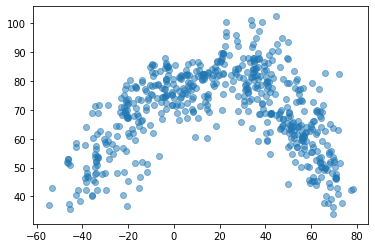

In [35]:
plt.scatter(weather_pd['Lat'],weather_pd['Max Temp'], marker="o", alpha=0.5)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Lattitude")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

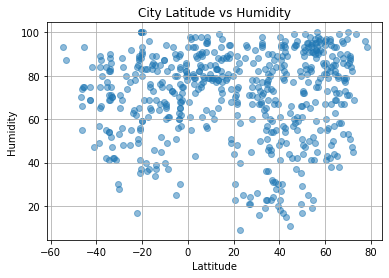

In [18]:
plt.scatter(weather_pd['Lat'],weather_pd['Humidity'], marker="o", alpha=0.5)
plt.ylabel("Humidity")
plt.xlabel("Lattitude")
plt.title("City Latitude vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

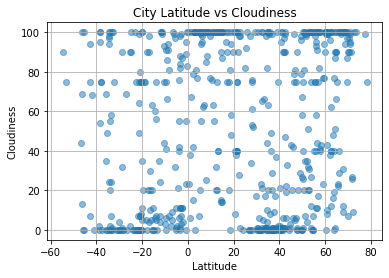

In [19]:
plt.scatter(weather_pd['Lat'],weather_pd['Cloudiness'], marker="o", alpha=0.5)
plt.ylabel("Cloudiness")
plt.xlabel("Lattitude")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

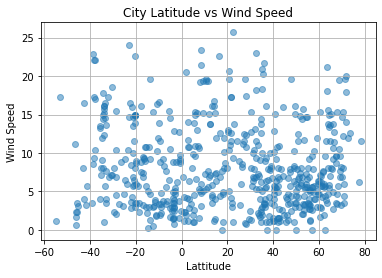

In [20]:
plt.scatter(weather_pd['Lat'],weather_pd['Wind Speed'], marker="o", alpha=0.5)
plt.ylabel("Wind Speed")
plt.xlabel("Lattitude")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_Windspeed.png")

# Show plot
plt.show()

## Linear Regression

In [21]:
#Dividing between Northern and Southern Hemisphere

northern_df = weather_pd.loc[weather_pd["Lat"] > 0]
southern_df = weather_pd.loc[weather_pd["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

0      61.511859
2      81.275892
3      71.509695
4      79.866943
5      81.033127
         ...    
572    65.207552
573    81.132707
574    74.467040
575    73.390986
577    65.842668
Name: Lat, Length: 393, dtype: float64
y =-0.43x +88.34


TypeError: 'str' object is not callable

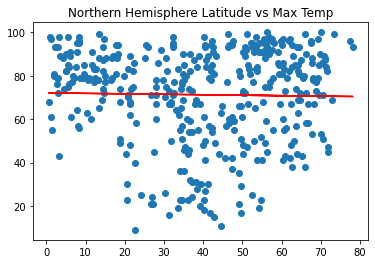

In [30]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.xlabel("j")
plt.ylabel("Temperature")
plt.annotate(line_eq,(20,15),fontsize=15, color="red")
plt.grid(True)
print(f"The r-value is {rvalue**2}")

# Save the figure
plt.savefig("figures/NLat_Temp_Reg.png")

# Show plot
plt.show()

  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      51.129207
7      54.534658
8      38.553434
11     55.299184
14     78.058008
         ...    
548    71.893498
553    68.109765
565    80.408391
567    68.475490
576    80.038378
Name: Lat, Length: 185, dtype: float64
y =0.77x +80.51
The r-value is 0.5767878310252458


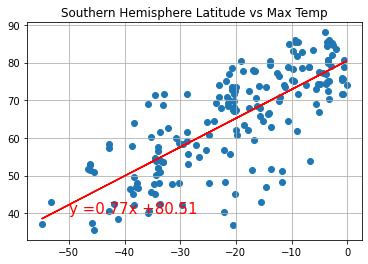

In [28]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.xlabel("j")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-50,40),fontsize=15, color="red")
plt.grid(True)
print(f"The r-value is {rvalue**2}")

# Save the figure
plt.savefig("figures/SLat_Temp_Reg.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      70.754602
2      71.726220
3      71.246105
4      71.656955
5      71.714285
         ...    
572    70.936286
573    71.719181
574    71.391490
575    71.338591
577    70.967509
Name: Lat, Length: 393, dtype: float64
y =-0.02x +72.07


TypeError: 'str' object is not callable

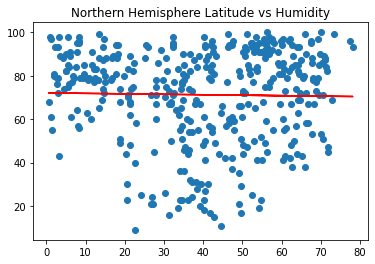

In [29]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.xlabel(x_axis_title)
plt.ylabel("Temperature")
plt.annotate(line_eq,(20,15),fontsize=15, color="red")
plt.grid(True)
print(f"The r-value is {rvalue**2}")

# Save the figure
plt.savefig("figures/SLat_Hum_Reg.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression